In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
import joblib

In [5]:
Data_path = "/u/home/m/mardren/scratch/SequenceML"
gkm_path = "%s/features.gkSVM.HepG2.tsv.gz"%Data_path
conv_path       = "%s/features.dragoNN_ConvModel.HepG2.SV40P.Rep1.tsv.gz"%Data_path
deepfact_path       = "%s/features.dragoNN_DeepFactorizedModel.HepG2.minP.Rep1.tsv.gz"%Data_path


#open data from csv into dataframes
gkm = pd.read_csv(gkm_path, header = 0, index_col = 0, sep = '\t')
conv  = pd.read_csv(conv_path, header = 0, index_col = 0, sep = '\t')
deepfact = pd.read_csv(deepfact_path, header = 0, index_col = 0, sep = '\t')


In [6]:
gkm

,feat_gksvm_0,feat_gksvm_1,feat_gksvm_2,feat_gksvm_3,feat_gksvm_4,feat_gksvm_5,feat_gksvm_6,feat_gksvm_7,feat_gksvm_8,feat_gksvm_9,...,feat_gksvm_21,feat_gksvm_22,feat_gksvm_23,feat_gksvm_24,feat_gksvm_25,feat_gksvm_26,feat_gksvm_27,feat_gksvm_28,feat_gksvm_29,feat_gksvm_30
region_id,,,,,,,,,,,,,,,,,,,,,
H1hesc_10_0_chr9_108475935,0.168235,0.167303,0.121179,0.025599,0.068835,0.085686,0.084215,0.071742,0.069392,0.084654,...,0.183466,0.186215,0.209022,0.216691,0.219999,0.221470,0.199165,0.191198,0.210325,0.203576
H1hesc_10_10_chr3_13672895,0.091165,0.079217,0.063813,0.053948,0.050406,0.041396,0.027467,0.029652,0.030587,0.014293,...,0.046051,0.060646,0.068540,0.075697,0.075770,0.071831,0.067059,0.079122,0.094555,0.108054
H1hesc_10_11_chr8_41583315,0.079925,0.082807,0.074358,0.081547,0.090344,0.077758,0.075930,0.066033,0.051477,0.029152,...,0.000206,-0.007041,-0.015113,-0.020976,-0.027943,-0.019792,-0.021683,-0.000133,0.008691,-0.003217
H1hesc_10_12_chr3_183889475,0.062385,0.066889,0.033292,0.037534,0.049792,0.057940,0.080544,0.145293,0.132796,0.093219,...,0.056088,0.053521,0.072022,0.070599,0.086915,0.105880,0.121408,0.129110,0.137701,0.142227
H1hesc_10_13_chr3_138502495,-0.033069,-0.018812,-0.000557,0.002979,-0.009467,-0.023400,-0.011873,-0.004101,-0.016431,-0.007128,...,0.017878,0.004001,-0.006963,-0.011236,-0.003219,0.002214,-0.000670,-0.007109,0.005289,0.013233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
K562_9_96_chr6_152416495,0.180957,0.183323,0.182212,0.158428,0.160757,0.152289,0.149371,0.136525,0.127337,0.151573,...,0.213895,0.233420,0.227541,0.212514,0.196626,0.099524,0.092495,0.087926,0.094073,0.119894
K562_9_97_chr3_170719195,0.126924,0.155140,0.167099,0.178455,0.181591,0.176023,0.177622,0.173440,0.190279,0.196150,...,0.328940,0.317871,0.328870,0.303394,0.281042,0.258941,0.256084,0.253629,0.250342,0.261417
K562_9_98_chr1_196018775,0.006297,0.007224,0.009293,0.020457,0.031708,0.034751,0.028142,0.033628,0.029276,0.026711,...,-0.028448,-0.039518,-0.034766,-0.020711,-0.018309,-0.008895,-0.021242,-0.033635,-0.038068,-0.027635


In [2]:
def train_model(tile_num, output_model_fn=None):
    #create datapaths 
    Data_path = "/u/home/m/mardren/SequenceML"
    gkm_path = "%s/features.gkSVM.HepG2.tsv.gz"%Data_path
    conv_path       = "%s/features.dragoNN_ConvModel.HepG2.SV40P.Rep1.tsv.gz"%Data_path
    deepfact_path       = "%s/features.dragoNN_DeepFactorizedModel.HepG2.minP.Rep1.tsv.gz"%Data_path


    #open data from csv into dataframes
    gkm = pd.read_csv(gkm_path, header = 0, index_col = 0, sep = '\t')
    conv  = pd.read_csv(conv_path, header = 0, index_col = 0, sep = '\t')
    deepfact = pd.read_csv(deepfact_path, header = 0, index_col = 0, sep = '\t')
    kmer_path = "%s/6mer_%s_new.pkl"%(Data_path,tile_num)
    kmer = pd.read_csv(kmer_path, index_col = 0, sep = '\t')
    gkm_15 = gkm[['feat_gksvm_%s'%tile_num]]
    gkm_15 = gkm_15.rename(columns = {'feat_gksvm_%s'%tile_num:'gkm_%s'%tile_num})
    conv_15 = conv[[tile_num]]
    conv_15 = conv_15.rename(columns = {tile_num:'conv_%s'%tile_num})
    deepfact_15 = deepfact[[tile_num]]
    deepfact_15 = deepfact_15.rename(columns = {tile_num:'deepfact_%s'%tile_num})
    kmer = kmer.rename(columns = {'label':'kmer_%s'%tile_num})
    
    #create data dataframe
    data = pd.concat([conv_15, gkm_15, deepfact_15, kmer], axis=1)
    
    #reset index to be able to access region_id
    data = data.reset_index()
    
    #split region_id to create chrom column
    data['chrom'] = data['region_id'].str.split('_').str[3]

    #setting aside chr1 and chr2 for testing data
    testing_data_chr1 = data[data["chrom"] == 'chr1']
    testing_data_chr2 = data[data["chrom"] == 'chr2']
    test_set = pd.concat([testing_data_chr1, testing_data_chr2])
    #removing chr1 and chr2 from training data
    training_data_nochr1 = data[data["chrom"] != 'chr1']
    train_set = training_data_nochr1[training_data_nochr1["chrom"] != 'chr2']
    #dropping the chrom column
    test_set = test_set.drop(columns=['chrom'])
    train_set = train_set.drop(columns=['chrom'])
    data = data.drop(columns=['chrom'])
    print(train_set.shape, test_set.shape)

    #format the training data
    labels = train_set['prediction'].values
    train_set = train_set.drop(columns=['region_id','prediction'])
    encodings = train_set.values.tolist()
    encodings = np.asarray(encodings)
    encodings_df = pd.DataFrame(encodings)
    encodings_df.fillna(encodings_df.mean(), inplace=True)
    encodings = encodings_df.to_numpy()
    labels = np.reshape(labels,(12888,))


    #format the testing data
    test_labels = test_set['prediction'].values
    test_set = test_set.drop(columns=['region_id','prediction'])
    test_encodings = test_set.values.tolist()
    test_encodings = np.asarray(test_encodings)
    test_encodings_df = pd.DataFrame(test_encodings)
    test_encodings_df.fillna(test_encodings_df.mean(), inplace=True)
    test_encodings = test_encodings_df.to_numpy()
    test_labels = np.reshape(test_labels,(2832,))
    
    #train a linear regressor on the training dataset. 
    from sklearn.linear_model import LinearRegression

    sequence_regressor = LinearRegression()
    sequence_regressor.fit(encodings, labels)
    print(sequence_regressor.coef_)
    
    if output_model_fn is None:
		output_model_fn = f"model.tile_{tile_num}.model"  
	joblib.dump(sequence_regressor, output_model_fn)


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 75)

In [7]:
kmer

,kmer_15,prediction
region_id,,
H1hesc_10_0_chr9_108475935,-1.087365,-0.067597
H1hesc_10_10_chr3_13672895,-1.391041,-0.346080
H1hesc_10_11_chr8_41583315,0.975140,-0.176071
H1hesc_10_12_chr3_183889475,1.081712,-0.754949
H1hesc_10_13_chr3_138502495,-0.935362,0.133559
...,...,...
K562_9_96_chr6_152416495,1.846433,1.119100
K562_9_97_chr3_170719195,-1.198396,0.327971
K562_9_98_chr1_196018775,-0.198396,0.606866


In [8]:
#create data dataframe
data = pd.concat([conv_15, gkm_15, deepfact_15, kmer], axis=1)


In [9]:
data

,conv_15,gkm_15,deepfact_15,kmer_15,prediction
region_id,,,,,
H1hesc_10_0_chr9_108475935,-0.055890,0.132106,0.142312,-1.087365,-0.067597
H1hesc_10_10_chr3_13672895,0.149902,0.013145,-0.262623,-1.391041,-0.346080
H1hesc_10_11_chr8_41583315,-0.194376,0.050826,0.145076,0.975140,-0.176071
H1hesc_10_12_chr3_183889475,0.081191,0.064345,0.338965,1.081712,-0.754949
H1hesc_10_13_chr3_138502495,-0.368951,0.045163,0.235830,-0.935362,0.133559
...,...,...,...,...,...
K562_9_96_chr6_152416495,0.644106,0.141500,0.908556,1.846433,1.119100
K562_9_97_chr3_170719195,-0.113810,0.275966,-0.105357,-1.198396,0.327971
K562_9_98_chr1_196018775,-0.123301,-0.033204,0.203964,-0.198396,0.606866


In [4]:
#reset index to be able to access region_id
data = data.reset_index()
data

,region_id,conv_15,gkm_15,deepfact_15,kmer_15,prediction
0,H1hesc_10_0_chr9_108475935,-0.055890,0.132106,0.142312,-1.087365,-0.067597
1,H1hesc_10_10_chr3_13672895,0.149902,0.013145,-0.262623,-1.391041,-0.346080
2,H1hesc_10_11_chr8_41583315,-0.194376,0.050826,0.145076,0.975140,-0.176071
3,H1hesc_10_12_chr3_183889475,0.081191,0.064345,0.338965,1.081712,-0.754949
4,H1hesc_10_13_chr3_138502495,-0.368951,0.045163,0.235830,-0.935362,0.133559
...,...,...,...,...,...,...
15715,K562_9_96_chr6_152416495,0.644106,0.141500,0.908556,1.846433,1.119100
15716,K562_9_97_chr3_170719195,-0.113810,0.275966,-0.105357,-1.198396,0.327971
15717,K562_9_98_chr1_196018775,-0.123301,-0.033204,0.203964,-0.198396,0.606866
15718,K562_9_99_chr1_15433275,-0.000221,0.105710,-0.275707,-0.372044,-1.268111


In [5]:
#split region_id to create chrom column
data['chrom'] = data['region_id'].str.split('_').str[3]
data

,region_id,conv_15,gkm_15,deepfact_15,kmer_15,prediction,chrom
0,H1hesc_10_0_chr9_108475935,-0.055890,0.132106,0.142312,-1.087365,-0.067597,chr9
1,H1hesc_10_10_chr3_13672895,0.149902,0.013145,-0.262623,-1.391041,-0.346080,chr3
2,H1hesc_10_11_chr8_41583315,-0.194376,0.050826,0.145076,0.975140,-0.176071,chr8
3,H1hesc_10_12_chr3_183889475,0.081191,0.064345,0.338965,1.081712,-0.754949,chr3
4,H1hesc_10_13_chr3_138502495,-0.368951,0.045163,0.235830,-0.935362,0.133559,chr3
...,...,...,...,...,...,...,...
15715,K562_9_96_chr6_152416495,0.644106,0.141500,0.908556,1.846433,1.119100,chr6
15716,K562_9_97_chr3_170719195,-0.113810,0.275966,-0.105357,-1.198396,0.327971,chr3
15717,K562_9_98_chr1_196018775,-0.123301,-0.033204,0.203964,-0.198396,0.606866,chr1
15718,K562_9_99_chr1_15433275,-0.000221,0.105710,-0.275707,-0.372044,-1.268111,chr1


In [6]:
#setting aside chr1 and chr2 for testing data
testing_data_chr1 = data[data["chrom"] == 'chr1']
testing_data_chr2 = data[data["chrom"] == 'chr2']
test_set = pd.concat([testing_data_chr1, testing_data_chr2])
#removing chr1 and chr2 from training data
training_data_nochr1 = data[data["chrom"] != 'chr1']
train_set = training_data_nochr1[training_data_nochr1["chrom"] != 'chr2']
#dropping the chrom column
test_set = test_set.drop(columns=['chrom'])
train_set = train_set.drop(columns=['chrom'])
data = data.drop(columns=['chrom'])



print(train_set.shape, test_set.shape)


(12888, 6) (2832, 6)


In [62]:
test_set

,region_id,conv_15,gkm_15,deepfact_15,kmer_15,prediction
13,H1hesc_10_21_chr1_2238075,-0.383960,0.035259,-0.019755,0.686126,-0.813227
23,H1hesc_10_30_chr1_207992455,-0.000268,0.250805,-0.028119,-1.354901,0.023929
37,H1hesc_10_7_chr1_12609975,0.076648,0.291972,0.627575,2.108102,-0.021496
41,H1hesc_11_10_chr1_42638235,0.200400,0.218674,0.760118,-1.852900,-0.046416
43,H1hesc_11_12_chr1_70953075,0.133456,0.116247,0.004871,1.487198,-0.171344
...,...,...,...,...,...,...
15659,K562_9_45_chr2_190956955,-0.153253,0.142208,0.097346,4.971529,-0.087745
15670,K562_9_55_chr2_196407915,-0.062781,0.090079,0.715197,2.064638,1.052274
15680,K562_9_64_chr2_21279395,-0.196315,0.177633,-0.353137,-3.198396,0.029724
15691,K562_9_74_chr2_20285795,0.126100,0.182553,-0.248195,-1.198396,-0.541526


In [7]:
#format the training data
labels = train_set['prediction'].values
train_set = train_set.drop(columns=['region_id','prediction'])
encodings = train_set.values.tolist()
encodings = np.asarray(encodings)
encodings_df = pd.DataFrame(encodings)
encodings_df.fillna(encodings_df.mean(), inplace=True)
encodings = encodings_df.to_numpy()
labels = np.reshape(labels,(12888,))


#format the testing data
test_labels = test_set['prediction'].values
test_set = test_set.drop(columns=['region_id','prediction'])
test_encodings = test_set.values.tolist()
test_encodings = np.asarray(test_encodings)
test_encodings_df = pd.DataFrame(test_encodings)
test_encodings_df.fillna(test_encodings_df.mean(), inplace=True)
test_encodings = test_encodings_df.to_numpy()
test_labels = np.reshape(test_labels,(2832,))






#del train_set, test_set

In [12]:
test_set

,conv_15,gkm_15,deepfact_15,kmer_15
13,-0.383960,0.035259,-0.019755,0.686126
23,-0.000268,0.250805,-0.028119,-1.354901
37,0.076648,0.291972,0.627575,2.108102
41,0.200400,0.218674,0.760118,-1.852900
43,0.133456,0.116247,0.004871,1.487198
...,...,...,...,...
15659,-0.153253,0.142208,0.097346,4.971529
15670,-0.062781,0.090079,0.715197,2.064638
15680,-0.196315,0.177633,-0.353137,-3.198396
15691,0.126100,0.182553,-0.248195,-1.198396


In [14]:
test_encodings

array([[-3.83960000e-01,  3.52588667e-02, -1.97554000e-02,
         6.86126403e-01],
       [-2.67792500e-04,  2.50805281e-01, -2.81192330e-02,
        -1.35490087e+00],
       [ 7.66476540e-02,  2.91972370e-01,  6.27574740e-01,
         2.10810167e+00],
       ...,
       [-1.96314840e-01,  1.77632881e-01, -3.53137170e-01,
        -3.19839638e+00],
       [ 1.26100080e-01,  1.82552637e-01, -2.48194990e-01,
        -1.19839638e+00],
       [ 2.58661200e-02,  1.47115926e-01, -1.23241894e-01,
         6.75396528e-01]])

In [15]:
test_labels

array([-0.81322682,  0.02392913, -0.021496  , ...,  0.02972358,
       -0.54152584,  0.33581687])

In [8]:
#train a linear regressor on the training dataset. 
from sklearn.linear_model import LinearRegression

sequence_regressor = LinearRegression()
sequence_regressor.fit(encodings, labels)
print(sequence_regressor.coef_)

[0.05906378 0.78386566 0.84915186 0.02641957]


In [9]:
#cross validation for ElasticNet regression
from sklearn.model_selection import GridSearchCV
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [11]:
search.fit(encodings, labels)
search.best_params_
#abs(search.best_score_)


{'alpha': 1e-05, 'l1_ratio': 0.8}

In [78]:
encodings_subset = encodings[:5]
labels_subset = labels[:5]

print("Predictions are: ", sequence_regressor.predict(encodings_subset))
print("Correct Labels:  ", list(labels_subset))

Predictions are:  [ 0.14690264 -0.28606631  0.1318484   0.32617837  0.14368733]
Correct Labels:   [-0.06759749541200288, -0.3460797013140533, -0.1760707489995117, -0.7549485033695766, 0.13355916122995337]


In [79]:
#check mean_squared_error
from sklearn.metrics import mean_squared_error
test_predictions = sequence_regressor.predict(test_encodings)
test_mse = mean_squared_error(test_predictions, test_labels)
test_rmse = np.sqrt(test_mse)
reg.coef_
train_predictions = sequence_regressor.predict(encodings)
train_mse = mean_squared_error(train_predictions, labels)
train_rmse = np.sqrt(train_mse)



print("Root Mean Squared error on training set is: ", train_rmse)
print("Root Mean Squared error on test set is:     ", test_rmse)

Root Mean Squared error on training set is:  0.5890271817901566
Root Mean Squared error on test set is:      0.6051807287742036


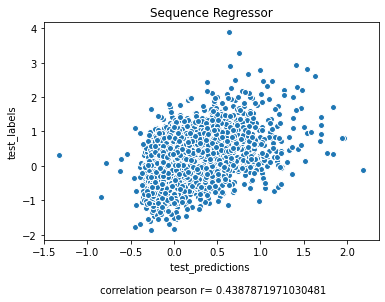

In [82]:
test_encodings=test_encodings.flatten()
test__labels=test_labels.flatten()
#visualize the results
caption = "correlation pearson r= %s"%(pd.Series(test_predictions).corr(pd.Series(test_labels)))


plt.scatter(
    x=test_predictions,
    y=test_labels,
    edgecolors='w'
)

plt.title("Sequence Regressor")
plt.xlabel("test_predictions \n\n %s"%caption)
plt.ylabel("test_labels")

plt.show()